# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the dataset

In [2]:
data = pd.read_csv('../Dataset/UniversalBank.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 14)

# Correlation Heatmap

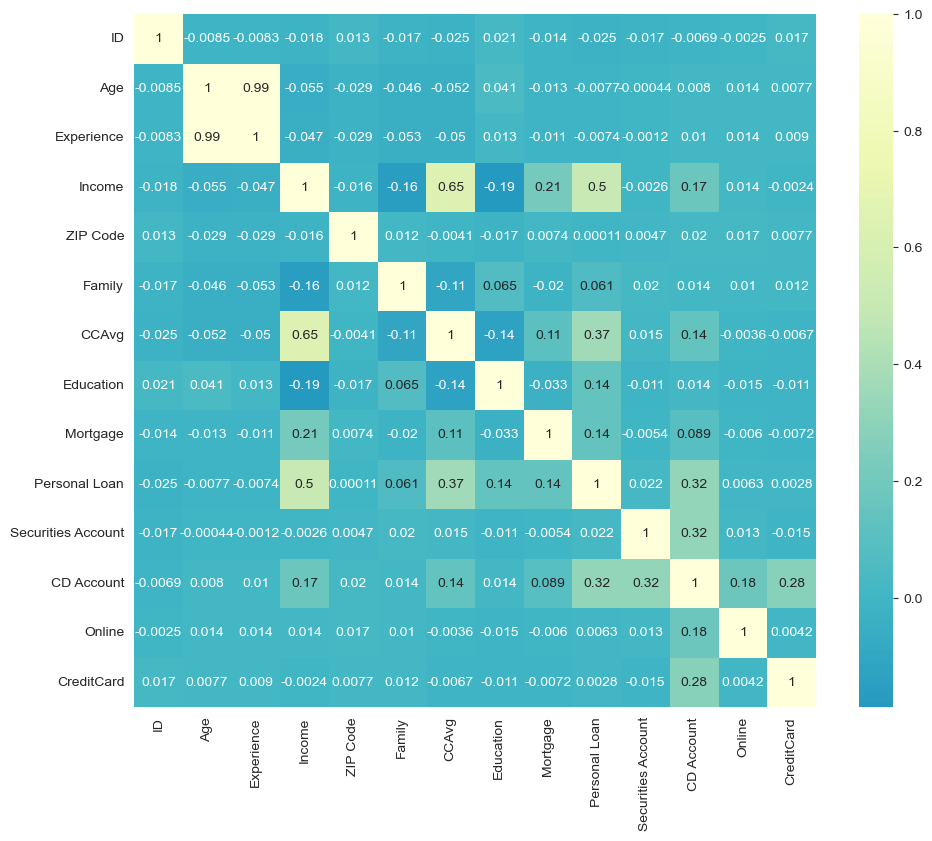

<Figure size 640x480 with 0 Axes>

In [4]:
# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
plt.figure(figsize=(11,9))

#Heatmap
sns.heatmap(data.corr(), cmap=plt.cm.YlGnBu_r, center=0, annot=True)

plt.show()
plt.savefig("heatmap.png")

## Feature Selection

From Correlation Heatmap,
Personal Loan(Target variable) is comparatively more dependent on Income, CCAvg, CD Account. So these are some top attributes.

Also Age and Experience are highly correlated. Hence we have to remove one of them to reduce noise and multicollinearity. Let us remove Experience as Personal Loan is more dependent on Age.

In [5]:
data = data.drop(['Experience'], axis=1)
data.head()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.shape

(5000, 13)

# Segregating Variables: Independent and Dependent Variables

In [7]:
#segregating variables
x = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
x.shape, y.shape

((5000, 12), (5000,))

# Scaling the data(Using MinMax Scaler)

In [8]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x = pd.DataFrame(x_scaled)

# Splitting the Dataset

In [10]:
# Importing Train test split
from sklearn.model_selection import train_test_split
# Splitting into Train and Test Data sets
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 49)

# Implementing the Models

KNN Classifier
Logistic Regressor
ANN
Random Forest Classifier
Naive Bayes
Decision Tree
Stochastic Gradient Descent
Support Vector Machines

In [11]:
# Importing the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [12]:
# Creating the models
knn_cls = KNeighborsClassifier(n_neighbors=5)
log_cls = LogisticRegression()
ann_cls = MLPClassifier(hidden_layer_sizes=100, max_iter=500, random_state=49, learning_rate_init=0.001 )
rf_cls = RandomForestClassifier(n_estimators=100)
nb_cls = GaussianNB()
dt_cls = DecisionTreeClassifier()
sgd_cls = SGDClassifier()
svm_cls = SVC()

In [13]:
# Fitting the models
knn_cls.fit(train_x,train_y)
log_cls.fit(train_x,train_y)
ann_cls.fit(train_x,train_y)
rf_cls.fit(train_x,train_y)
nb_cls.fit(train_x,train_y)
dt_cls.fit(train_x,train_y)
sgd_cls.fit(train_x,train_y)
svm_cls.fit(train_x,train_y)

SVC()

## Evaluation and Cross-Validation of the models

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Defining parameters for Cross-Validation
num_folds = 5
cv = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = 49)

# Creating a Cross-Validation Function
def cv_model(model, x, y):
    precision_scores = cross_val_score(model, x, y, cv=cv, scoring='precision')
    f1_scores = cross_val_score(model, x, y, cv=cv, scoring='f1')
    roc_auc_scores = cross_val_score(model, x, y, cv=cv, scoring = 'roc_auc')

    return precision_scores.mean(), f1_scores.mean(), roc_auc_scores.mean()

# Performing Cross-Validation for each model
results = []
models = ["KNN Classifier", "Logistic Regressor", "ANN", "Random Forest", "Naive Bayes", "Decision Tree", "Stochastic Gradient Descent", "Support Vector Machines"]

for model, model_name in zip([knn_cls, log_cls, ann_cls, rf_cls, nb_cls, dt_cls, sgd_cls, svm_cls], models ):
    precision_scores_mean, f1_mean, roc_auc_mean = cv_model(model, x, y)

    # Storing the Results
    results.append({
        "Model": model_name,
        "Precision": precision_scores_mean,
        "F1 Score": f1_mean,
        "ROC-AUC Score": roc_auc_mean
    })

# Creating a dataframe to store the results
cv_df = pd.DataFrame(results)
cv_df


,Model,Precision,F1 Score,ROC-AUC Score
0,KNN Classifier,0.939572,0.675966,0.917741
1,Logistic Regressor,0.863430,0.684920,0.957695
2,ANN,0.930763,0.902610,0.990540
3,Random Forest,0.980456,0.922139,0.997373
4,Naive Bayes,0.427153,0.491106,0.925726
5,Decision Tree,0.914175,0.894456,0.935269
6,Stochastic Gradient Descent,0.837161,0.691592,0.955088
7,Support Vector Machines,0.978283,0.830742,0.984428


### Comparison of the Models

From the above results table, we can conclude that Random Forest Classifier model is performing well. Hence we shall use this model for predicting on the final test data set.
(The explanation for the lesser performance of other models is present in the ModelsComparison.md)

# Hyperparameter Tuning of the Best Model(Random Forrest Classifier)

In [15]:
from pprint import pprint
# Parameters used by our current model
print('Parameters currently in use:\n')
pprint(rf_cls.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Using GridSearchCV

In [25]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Creating and Defining hyperparameters of model
cls_model = rf_cls
parameters = {'max_depth'               : [50,100,150,200], 
              'min_samples_leaf'        : list(range(1,10,2)),
              'min_samples_split'       : list(range(1,10,2)),
              'n_estimators'            : list(range(1,501,100)),
              'bootstrap'               : [True,False]
              }


# Instantiate the grid search model
grid = GridSearchCV(estimator = rf_cls ,param_grid = parameters, cv = 3, n_jobs = -1, verbose = 2) # n_jobs is defined to speed up the process

# Fitting GridSearchCV
grid.fit(train_x, train_y)

# Getting the Best hyperparameters
best_par = grid.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Users\Lekhya\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lekhya\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lekhya\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Lekhya\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

In [26]:
# Creating the optimal model with the best hyperparameters
opt_model = RandomForestClassifier(**best_par)

### Comparison of original and tuned models

In [27]:
# We shall use the dunction defined during cross-validation of the various classification models

# Creating a Cross-Validation Function
def cv_model(model, x, y):
    precision_scores = cross_val_score(model, x, y, cv=cv, scoring='precision')
    f1_scores = cross_val_score(model, x, y, cv=cv, scoring='f1')
    roc_auc_scores = cross_val_score(model, x, y, cv=cv, scoring = 'roc_auc')

    return precision_scores.mean(), f1_scores.mean(), roc_auc_scores.mean()

# Performing Cross-Validation for each model
results = []
models = ["Original RF Model", "Tuned RF Model"]

for model, model_name in zip([rf_cls, opt_model], models ):
    precision_scores_mean, f1_mean, roc_auc_mean = cv_model(model, x, y)

    # Storing the Results
    results.append({
        "Model": model_name,
        "Precision": precision_scores_mean,
        "F1 Score": f1_mean,
        "ROC-AUC Score": roc_auc_mean
    })

# Creating a dataframe to store the results
cv_df = pd.DataFrame(results)
cv_df

,Model,Precision,F1 Score,ROC-AUC Score
0,Original RF Model,0.979841,0.920557,0.997176
1,Tuned RF Model,0.967131,0.922495,0.996963


From above results, we can conclude that the F1 score has improved in the Tuned RF Model.

Precision is important if we want to minimize the risk of approving a loan that shouldn't be approved.
F1 score is important if we want to balance the trade-off between false positives and false negatives.
ROC-AUC is important if we are interested in the overall ability of the model to discriminate between approved and not-approved loans, considering different probability thresholds.

If we take Precision and ROC-AUC to be the important factors, we use the original RF Model to predict the results on the final test data set.
If we take F1 score to be the important factor, we use the tuned RF Model to predict the results on the final test data set.

# Predicting on the Test Data Set

### Using the Original Model

In [35]:
# Fitting the model to Train Data
rf_cls.fit(train_x, train_y)
# Predicting on Test Data
test_pre1 = rf_cls.predict(test_x)

In [36]:
# Evaluation using Precision:
from sklearn.metrics import precision_score
Precision1 = precision_score(test_y, test_pre1)

# Evaluation using F1 Score:
from sklearn.metrics import f1_score
F1_Score1 = f1_score(test_y, test_pre1)

# Evaluation using ROC-AUC:
from sklearn.metrics import roc_auc_score
ROC_AUC1 = roc_auc_score(test_y, test_pre1)

### Using the Tuned Model

In [37]:

# Fitting the model to Train Data
opt_model.fit(train_x, train_y)
# Predicting on Test Data
test_pre2 = opt_model.predict(test_x)

In [38]:
# Evaluation using Precision:
Precision2 = precision_score(test_y, test_pre2)

# Evaluation using F1 Score:
F1_Score2= f1_score(test_y, test_pre2)

# Evaluation using ROC-AUC:
ROC_AUC2 = roc_auc_score(test_y, test_pre2)

### Comparison

In [39]:
comparison_data=[['Original RF Model',Precision1,F1_Score1,ROC_AUC1],['Tuned RF Model',Precision2,F1_Score2,ROC_AUC2]]
comparison = pd.DataFrame(comparison_data,columns=['Model','Precision','F1 Score','ROC-AUC'])
comparison

,Model,Precision,F1 Score,ROC-AUC
0,Original RF Model,0.989796,0.941748,0.948636
1,Tuned RF Model,0.979592,0.932039,0.943569
